In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
df.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.shape

(768, 9)

In [ ]:
df.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627  

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

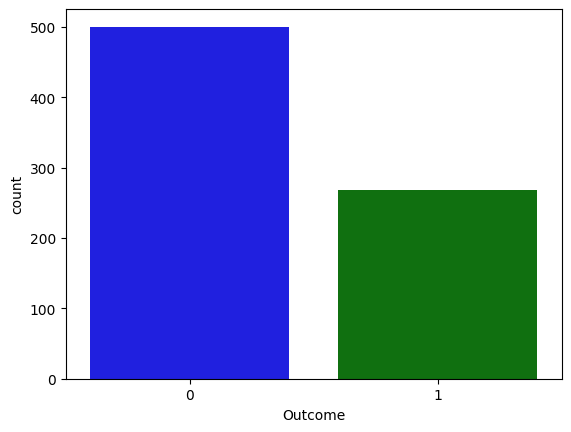

In [6]:
sns.countplot(x='Outcome',data=df,palette=['b','g'])

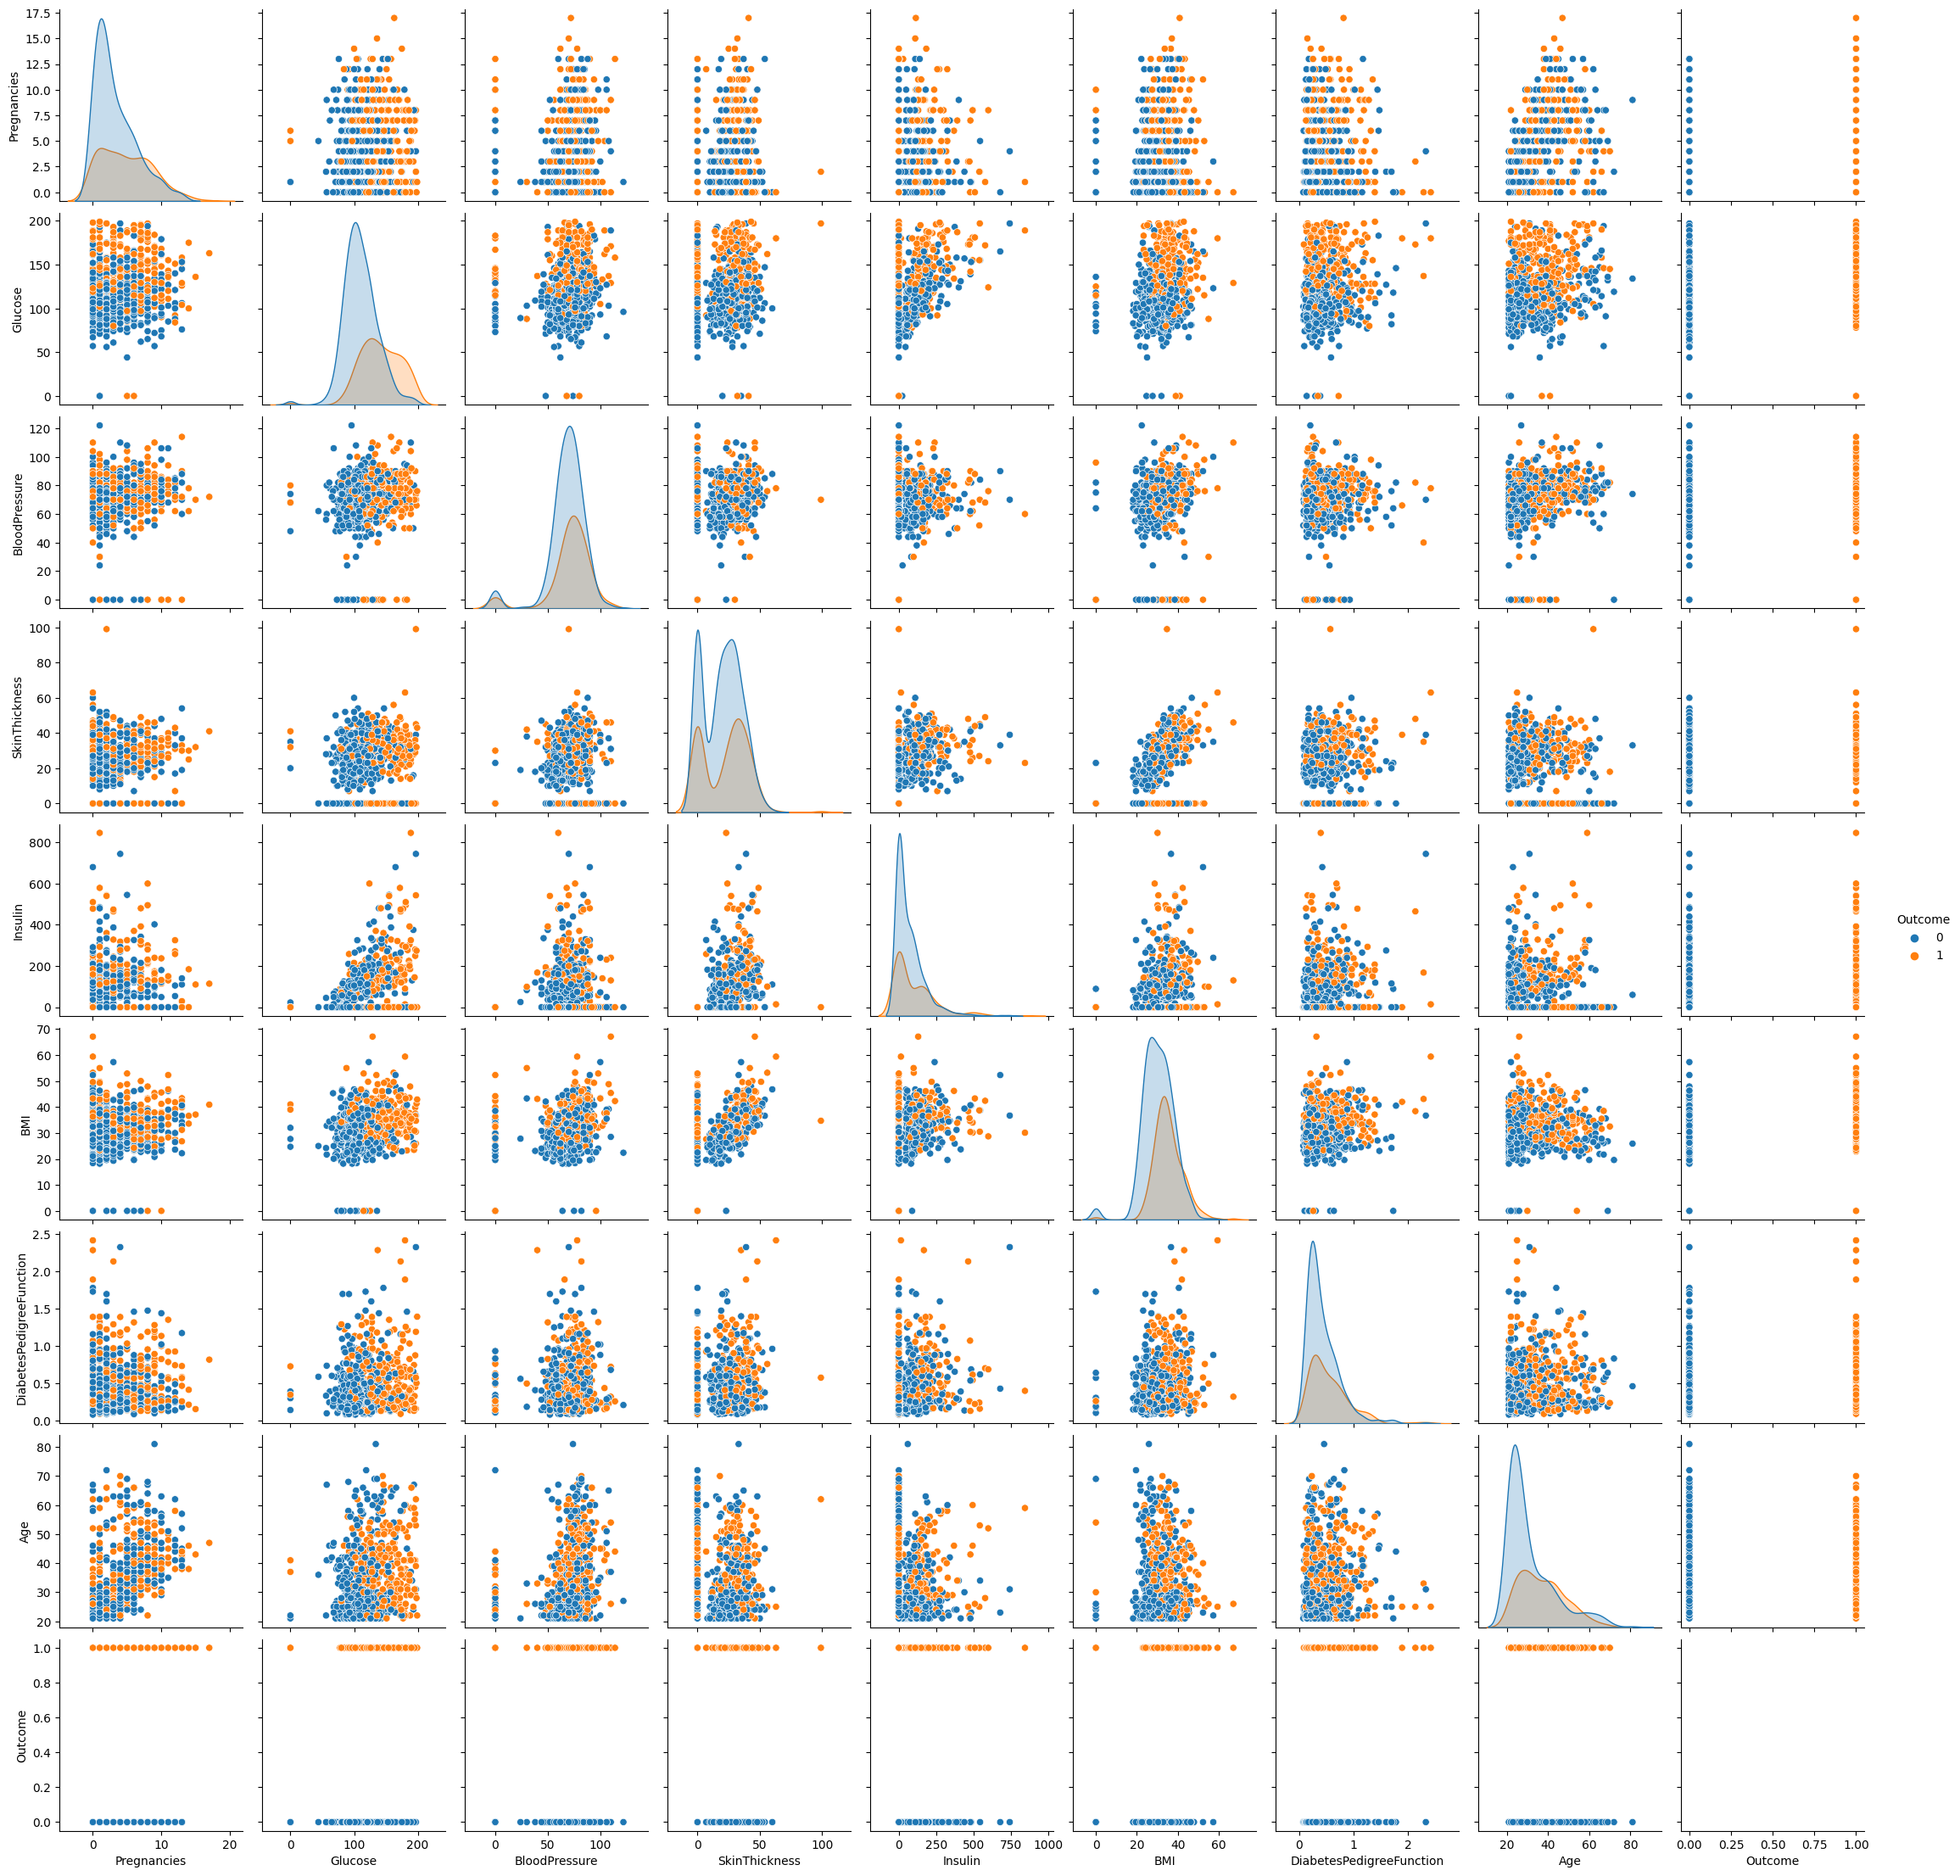

In [7]:
sns.pairplot(data=df,vars=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'], hue='Outcome')
plt.show()

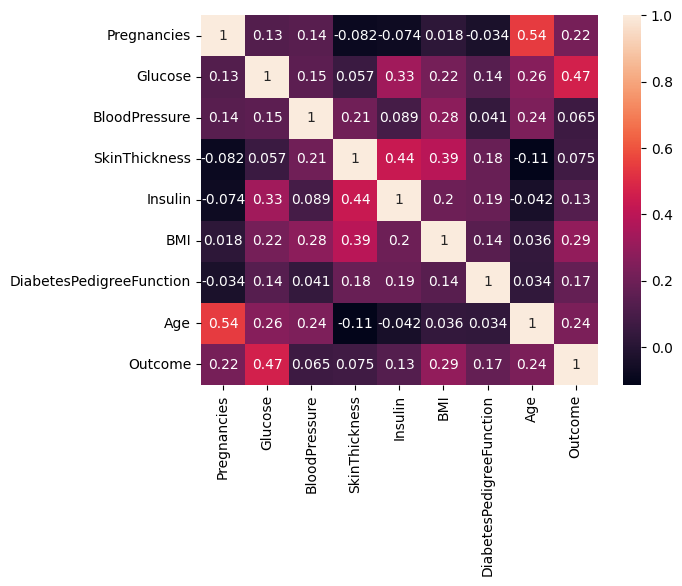

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
df_new=df
df_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = df_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN)

In [ ]:
df_new.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
df_new["Glucose"].fillna(df_new["Glucose"].mean(), inplace = True)
df_new["BloodPressure"].fillna(df_new["BloodPressure"].mean(), inplace = True)
df_new["SkinThickness"].fillna(df_new["SkinThickness"].mean(), inplace = True)
df_new["Insulin"].fillna(df_new["Insulin"].mean(), inplace = True)
df_new["BMI"].fillna(df_new["BMI"].mean(), inplace = True)

In [ ]:
df_new.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
y=df_new['Outcome']
X=df_new.drop('Outcome',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.20,random_state=0,stratify=df_new['Outcome'])

In [ ]:
X_train.shape

(614, 8)

In [ ]:
X_test.shape

(154, 8)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_test, Y_test)
y_pred = dt_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
dt_accuracy = accuracy_score(Y_test,y_pred)
print(confusion_matrix(Y_test, y_pred))


[[92  8]
 [ 5 49]]


In [ ]:
dt_accuracy

0.9155844155844156

In [ ]:
y_pred[0:]

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       100
           1       0.86      0.91      0.88        54

    accuracy                           0.92       154
   macro avg       0.90      0.91      0.91       154
weighted avg       0.92      0.92      0.92       154



In [ ]:
X_test['pred'] = y_pred
print(X_test)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
680            2     56.0           56.0       28.00000   45.000000  24.2   
607            1     92.0           62.0       25.00000   41.000000  19.5   
639            1    100.0           74.0       12.00000   46.000000  19.5   
638            7     97.0           76.0       32.00000   91.000000  40.9   
295            6    151.0           62.0       31.00000  120.000000  35.5   
..           ...      ...            ...            ...         ...   ...   
526            1     97.0           64.0       19.00000   82.000000  18.2   
685            2    129.0           74.0       26.00000  205.000000  33.2   
391            5    166.0           76.0       29.15342  155.548223  45.7   
654            1    106.0           70.0       28.00000  135.000000  34.2   
315            2    112.0           68.0       22.00000   94.000000  34.1   

     DiabetesPedigreeFunction  Age  pred  
680                     0.332   